In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load datasets
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

# Select features and handle missing values
features = ['LotArea', 'OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt']  # Adjust as needed
train_data = train_data[features + ['SalePrice']].dropna()
test_data = test_data[features].fillna(test_data[features].mean())  # Fill missing values in test set

# Separate features and target
X = train_data[features]
y = train_data['SalePrice']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on validation set
y_pred_val = model.predict(X_val)





Validation MSE: 1754650624.040274, R²: 0.7712417208024139


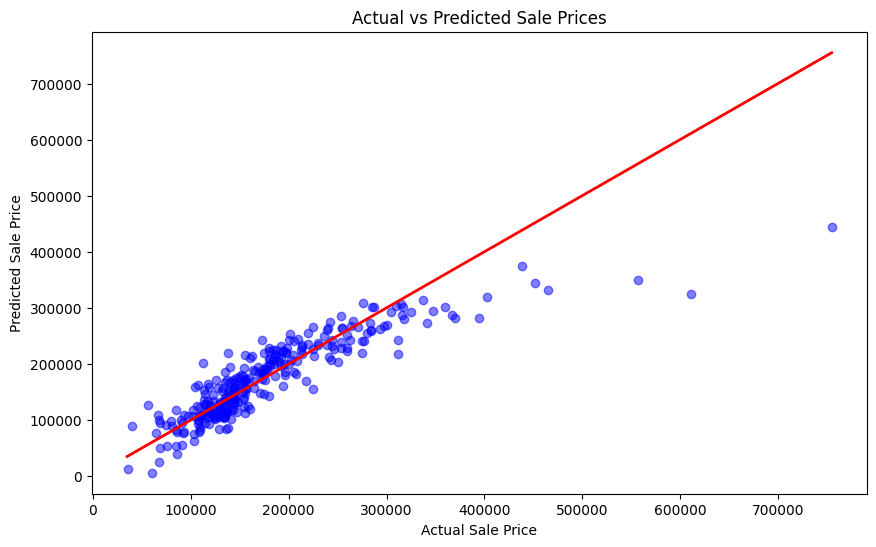

In [ ]:
# Calculate and print metrics

val_mse = mean_squared_error(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)
print(f"Validation MSE: {val_mse}, R²: {val_r2}")

# Visualize predictions vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred_val, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Prices')
plt.show()

# Make predictions on the test data
test_predictions = model.predict(test_data[features])


In [ ]:
if 'Id' not in test_data.columns:
    test_data['Id'] = range(1, len(test_data) + 1)


In [ ]:
# Remove 'Id' and save only 'SalePrice'
submission = pd.DataFrame({'SalePrice': test_predictions})
submission.to_csv('/content/sample_submission (1).csv', index=False)


In [ ]:
submission

,SalePrice
0,109361.588452
1,154626.756927
2,176431.791403
3,195565.061098
4,219508.612855
...,...
1454,76056.635233
1455,91599.916277
1456,147339.909804
1457,108324.063273


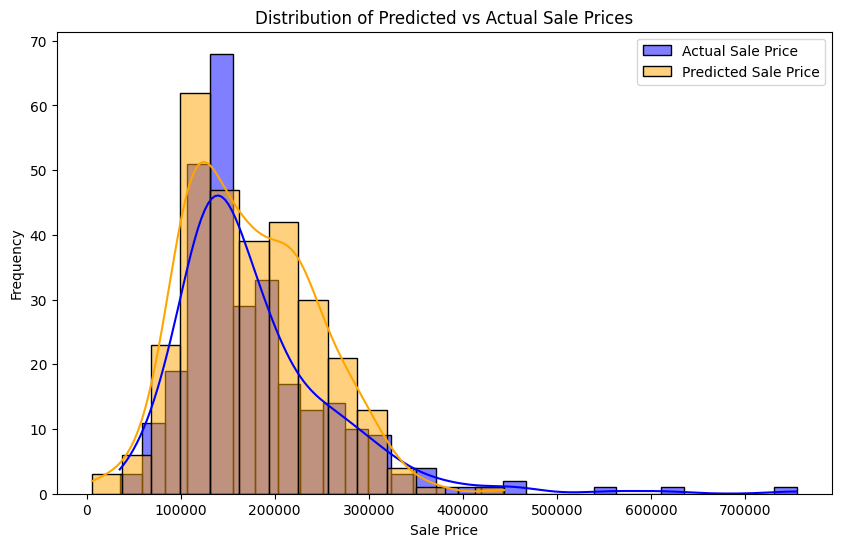

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(y_val, color='blue', label='Actual Sale Price', kde=True)
sns.histplot(y_pred_val, color='orange', label='Predicted Sale Price', kde=True)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Predicted vs Actual Sale Prices')
plt.show()


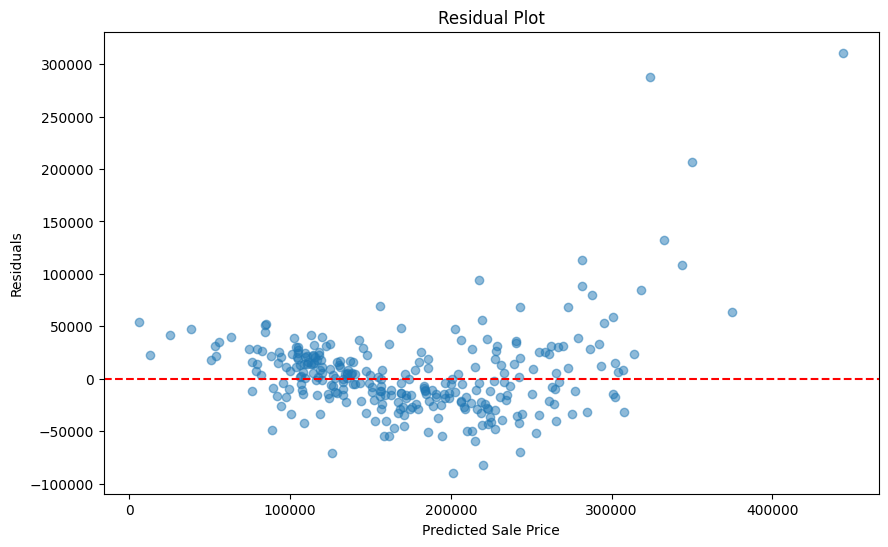

In [ ]:
residuals = y_val - y_pred_val

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_val, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


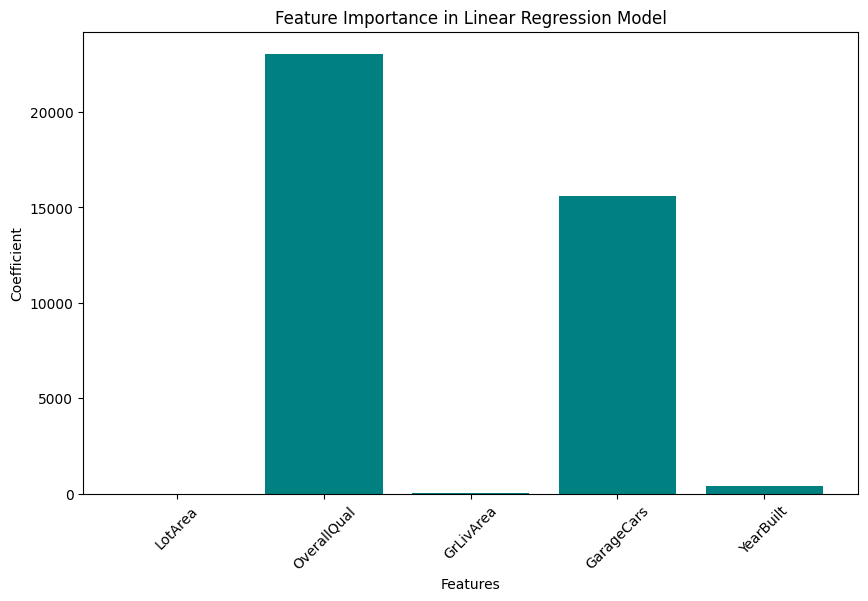

In [ ]:
# Get coefficients of the features
coefficients = model.coef_
features = X.columns

plt.figure(figsize=(10, 6))
plt.bar(features, coefficients, color='teal')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Importance in Linear Regression Model')
plt.xticks(rotation=45)
plt.show()


<ipython-input-43-9cb7b38148c9>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='black')


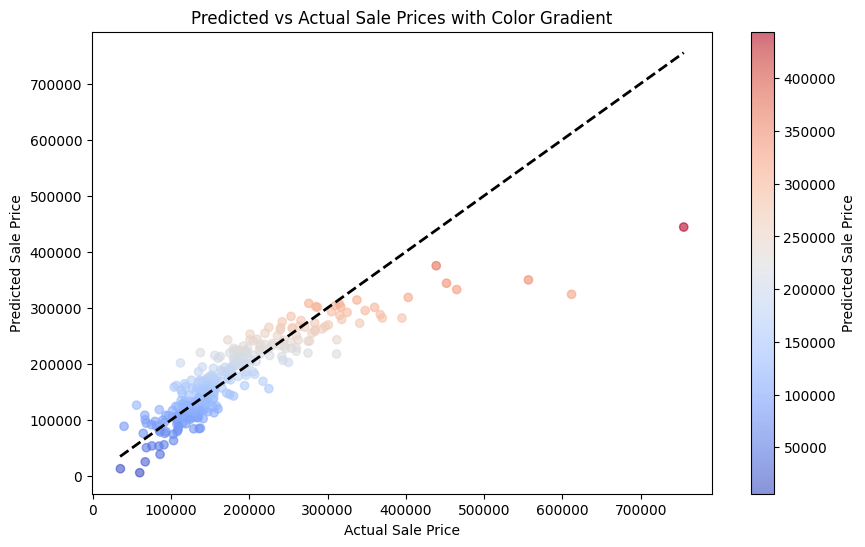

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred_val, c=y_pred_val, cmap='coolwarm', alpha=0.6)
plt.colorbar(label='Predicted Sale Price')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='black')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Predicted vs Actual Sale Prices with Color Gradient')
plt.show()
